For this practical work, We will develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = 2 * np.linspace(0,20)
y = -1 *x + 2

In [3]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [4]:
X = np.c_[ np.ones((len(x),1)),x]

#### Plot your data points. 

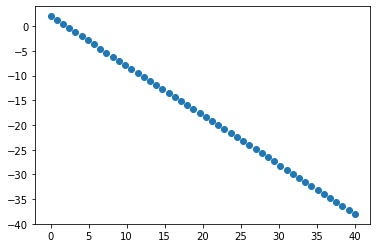

((50, 1), (50, 1))

In [5]:
plt.scatter(x,y)
plt.show()
x.shape,y.shape

In [6]:
def calc_cost(y,y_hat):
    norm = np.linalg.norm(y_hat - y)
    return (1/2*len(y))  * np.sum(np.square(norm**2))

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

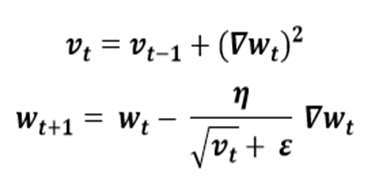

In [7]:
def adgrade_gradient_descent(X, y, theta, alpha=0.001, iterations=1000,epsilon = 0.00001):
    
    m = len(y)
    cost_history = []
    theta_history = np.zeros((iterations,theta.size))
    v =0
    for i in range(iterations):
        y_hat = np.dot(X,theta)
        cost_history.append(calc_cost(y,y_hat))

        grad = (1/m)* X.T.dot((y_hat - y))
        v = v +  (grad)**2
        theta = theta -(alpha / (np.sqrt(v) + epsilon)) * grad
        
        theta_history[i,:] = theta.T
        
        if (np.linalg.norm(grad) <= 1):
            break

    return theta, cost_history, theta_history[:i+1,:]

### first traile

In [8]:
iters_1 = 500
alpha_1 = 0.025

theta_adg_1, cost_history_adg_1, theta_history_adg_1= adgrade_gradient_descent(X,y,theta, alpha_1,iters_1)

In [9]:
y_hat_adg_1 = theta_adg_1[0] + theta_adg_1[1] *x

In [10]:
r2_score(y, y_hat_adg_1)

0.9125638309196071

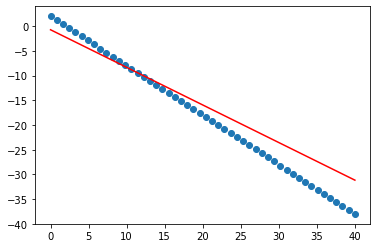

In [11]:
# best line fit
plt.plot(x,y_hat_adg_1,color= 'red')
plt.scatter(x,y)
plt.show()

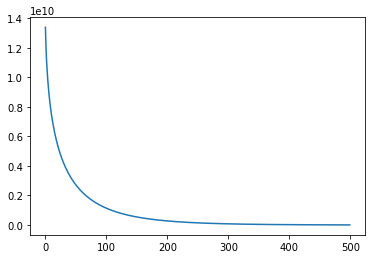

In [12]:
# cost vs iteration
plt.plot(cost_history_adg_1)
plt.show()

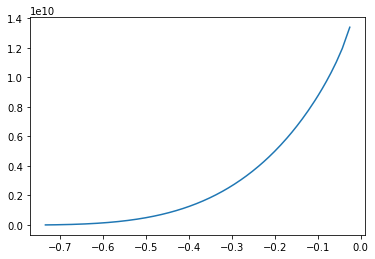

In [13]:
# theta0 with the iterations
plt.plot(theta_history_adg_1[:,0], cost_history_adg_1)
plt.show()

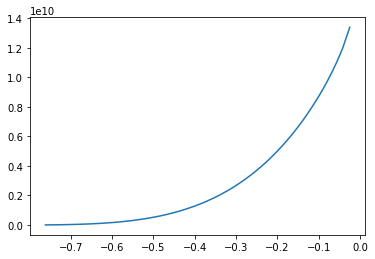

In [14]:
# theta1 with the iterations
plt.plot(theta_history_adg_1[:,1], cost_history_adg_1)
plt.show()

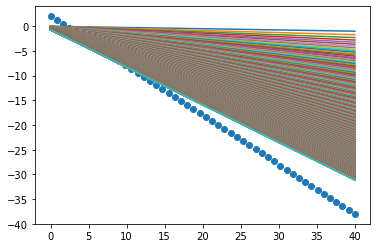

In [15]:
y_hat_adg_hist_1 =np.array([theta_history_adg_1[i,1] *x + theta_history_adg_1[i,0]*1 for i in range(theta_history_adg_1.shape[0])]) 
for line in y_hat_adg_hist_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

### second traile

In [16]:
iters_2 = 1000
alpha_2 = 0.07

theta_adg_2, cost_history_adg_2, theta_history_adg_2= adgrade_gradient_descent(X,y,theta, alpha_2,iters_2)

In [17]:
y_hat_adg_2 = theta_adg_2[0] + theta_adg_2[1] *x

In [18]:
r2_score(y, y_hat_adg_2)

0.9872111876498019

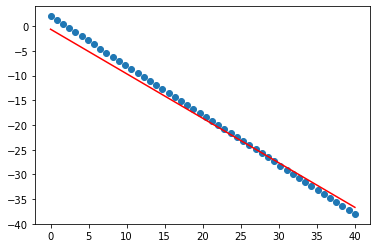

In [19]:
# best line fit
plt.plot(x,y_hat_adg_2,color= 'red')
plt.scatter(x,y)
plt.show()

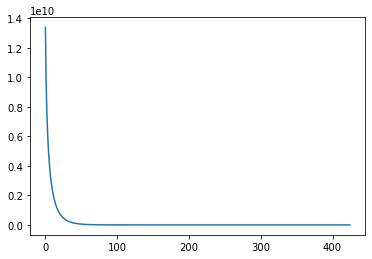

In [20]:
# cost vs iteration
plt.plot(cost_history_adg_2)
plt.show()

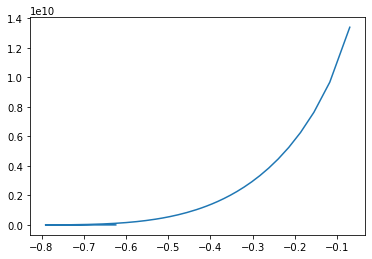

In [21]:
# theta0 with the iterations
plt.plot(theta_history_adg_2[:,0], cost_history_adg_2)
plt.show()

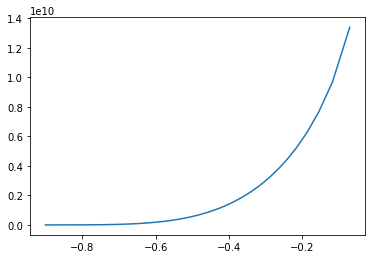

In [22]:
# theta1 with the iterations
plt.plot(theta_history_adg_2[:,1], cost_history_adg_2)
plt.show()

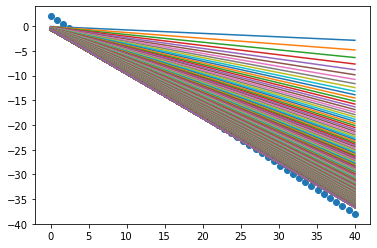

In [23]:
y_hat_adg_hist_2 =np.array([theta_history_adg_2[i,1] *x + theta_history_adg_2[i,0]*1 for i in range(theta_history_adg_2.shape[0])]) 
for line in y_hat_adg_hist_2:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

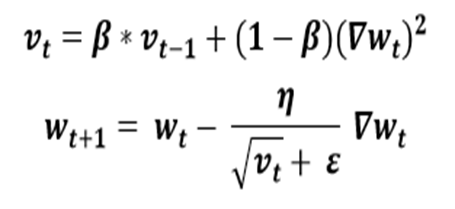

In [24]:
def RMSProp_gradient_descent(X, y, theta, alpha=0.001, iterations=1000,jamma = 0.9, epsilon = 0.00001):
    
    m = len(y)
    cost_history = []
    theta_history = np.zeros((iterations,theta.size))
    v =0
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        cost_history.append([calc_cost(y,y_hat)])

        grad = (1/m)* X.T.dot((y_hat - y))
        v = jamma * v + (1-jamma)*(grad)**2
        theta = theta -(alpha / (np.sqrt(v) + epsilon)) * grad
        
        theta_history[i,:] = theta.T

        if (np.linalg.norm(grad) <= 1):
                break

    return theta, cost_history, theta_history[:i+1,:]

### first trail

In [25]:
iters_1 = 500
alpha_1 = 0.01
jamma_1 = 0.9
theta_rms_1, cost_history_rms_1, theta_history_rms_1 = RMSProp_gradient_descent(X,y,theta, alpha_1,iters_1,jamma_1)

In [26]:
y_hat_rms_1 = theta_rms_1[0] + theta_rms_1[1] *x

In [27]:
r2_score(y, y_hat_rms_1)

0.9867866676926043

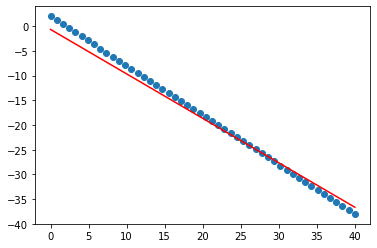

In [28]:
# best fit line
plt.plot(x,y_hat_rms_1,color= 'red')
plt.scatter(x,y)
plt.show()

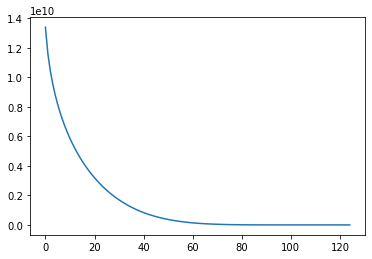

In [29]:
# cost vs iterations
plt.plot(cost_history_rms_1)
plt.show()

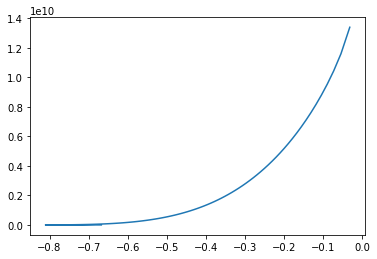

In [30]:
# cost vs theta0
plt.plot(theta_history_rms_1[:,0], cost_history_rms_1)
plt.show()

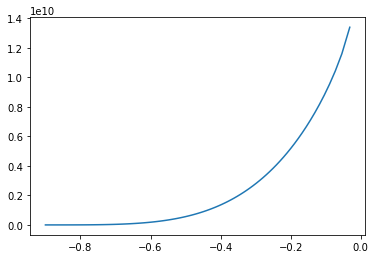

In [31]:
# cost vs theta1
plt.plot(theta_history_rms_1[:,1], cost_history_rms_1)
plt.show()

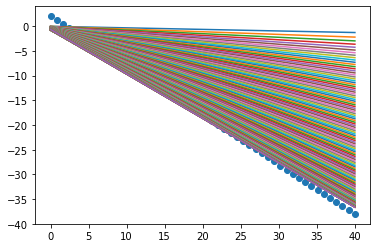

In [32]:
y_hat_rms_hist_1 =np.array([theta_history_rms_1[i,1] *x + theta_history_rms_1[i,0]*1 for i in range(theta_history_rms_1.shape[0])]) 
for line in y_hat_rms_hist_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

### second trail

In [33]:
iters_2 = 700
alpha_2 = 0.05
jamma_2 = 0.7
theta_rms_2, cost_history_rms_2, theta_history_rms_2 = RMSProp_gradient_descent(X,y,theta, alpha_2,iters_2,jamma_2)

In [34]:
y_hat_rms_2 = theta_rms_2[0] + theta_rms_2[1] *x

In [35]:
r2_score(y, y_hat_rms_2)

0.9868917149145933

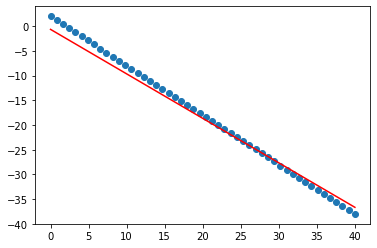

In [36]:
# best fit line
plt.plot(x,y_hat_rms_2,color= 'red')
plt.scatter(x,y)
plt.show()

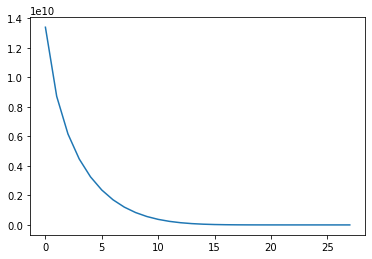

In [37]:
# cost vs iterations
plt.plot(cost_history_rms_2)
plt.show()

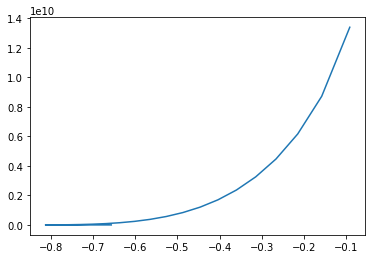

In [38]:
# cost vs theta0
plt.plot(theta_history_rms_2[:,0], cost_history_rms_2)
plt.show()

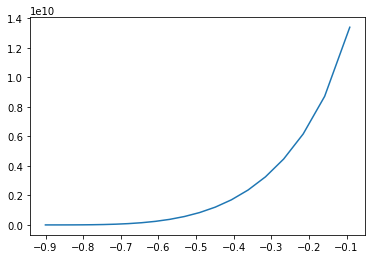

In [39]:
# cost vs theta1
plt.plot(theta_history_rms_2[:,1], cost_history_rms_2)
plt.show()

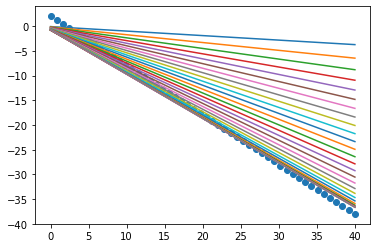

In [40]:
y_hat_rms_hist_2 =np.array([theta_history_rms_2[i,1] *x + theta_history_rms_2[i,0]*1 for i in range(theta_history_rms_2.shape[0])]) 
for line in y_hat_rms_hist_2:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

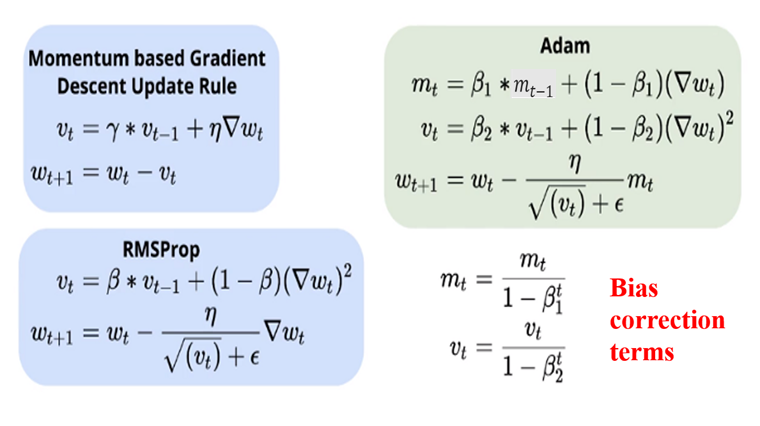

In [41]:
def Adam_gradient_descent(X, y, theta, alpha=0.001, iterations=1000,jamma_mom = 0.9,jamma_rms = 0.9, epsilon = 0.000001):
    
    m = len(y)
    cost_history = []
    theta_history = np.zeros((iterations,theta.size))
    v_mom =0
    v_rms =0
    
    for i in range(iterations):
        
        y_hat = np.dot(X,theta)
        cost_history.append(calc_cost(y,y_hat)) 

        grad = (1/m)* X.T.dot((y_hat - y))
        v_mom = jamma_mom * v_mom + (1 - jamma_mom) * grad 
        v_rms = jamma_rms * v_rms + (1-jamma_rms)*(grad)**2
        
        if (i != 0):   
            v_mom=(v_mom/(1-jamma_mom**(i)))
            v_rms=(v_rms/(1-jamma_rms**(i)))
            
        theta = theta -(alpha / (np.sqrt(v_rms) + epsilon)) * v_mom
        
        theta_history[i,:] = theta.T
        if (np.linalg.norm(grad) <= 0.5):
                break

    return theta, cost_history, theta_history[:i+1,:]

### trail 1

In [42]:
iters_1 = 500
alpha_1 = 0.01
jamma_mom_1 = 0.8
jamma_rms_1 = 0.8
theta_adam_1, cost_history_adam_1, theta_history_adm_1 = Adam_gradient_descent(X,y,theta, alpha_1,iters_1,jamma_mom_1,jamma_rms_1)

In [43]:
y_hat_adam_1 = theta_adam_1[0] + theta_adam_1[1] *x

In [44]:
r2_score(y, y_hat_adam_1)

0.9934245497777651

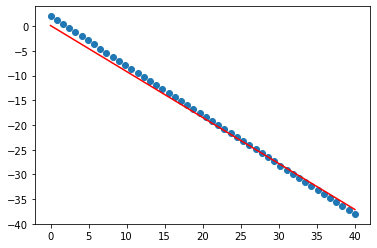

In [45]:
# best fitted line
plt.plot(x,y_hat_adam_1,color= 'red')
plt.scatter(x,y)
plt.show()

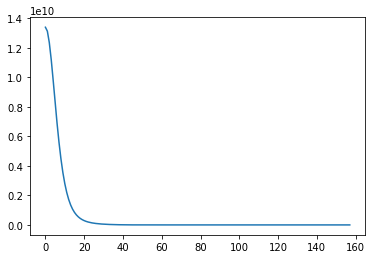

In [46]:
# cost vs iterations
plt.plot(cost_history_adam_1)
plt.show()

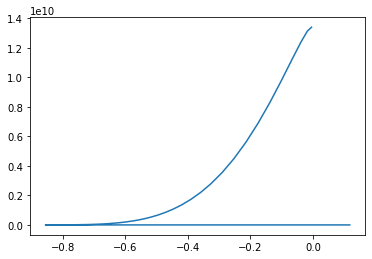

In [47]:
# theta0 vs cost
plt.plot(theta_history_adm_1[:,0], cost_history_adam_1)
plt.show()

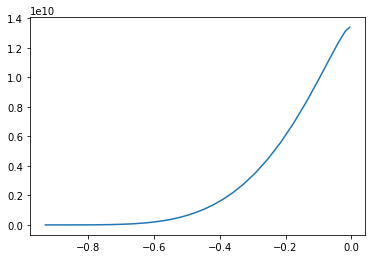

In [48]:
# theta1 vs cost
plt.plot(theta_history_adm_1[:,1], cost_history_adam_1)
plt.show()

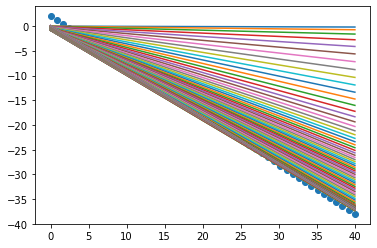

In [49]:
y_hat_adam_hist_1 =np.array([theta_history_adm_1[i,1] *x + theta_history_adm_1[i,0]*1 for i in range(theta_history_adm_1.shape[0])]) 
for line in y_hat_adam_hist_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

### trail 2

In [50]:
iters_2 = 1000
alpha_2 = 0.05
jamma_mom_2 = 0.5
jamma_rms_2 = 0.5

theta_adam_2, cost_history_adam_2, theta_history_adm_2 = Adam_gradient_descent(X,y,theta, alpha_2,iters_2,jamma_mom_2,jamma_rms_2)

In [51]:
y_hat_adam_2 = theta_adam_2[0] + theta_adam_2[1] *x

In [52]:
r2_score(y, y_hat_adam_2)

0.9966736150699076

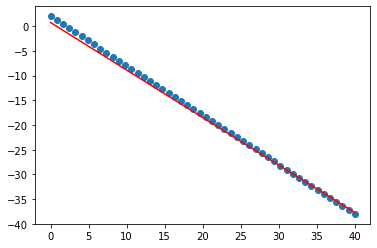

In [53]:
# best fitted line
plt.plot(x,y_hat_adam_2,color= 'red')
plt.scatter(x,y)
plt.show()

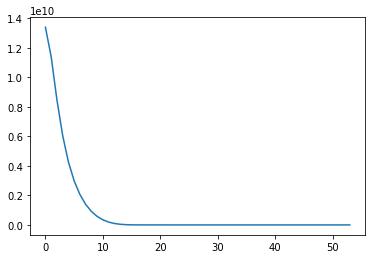

In [54]:
# cost vs iterations
plt.plot(cost_history_adam_2)
plt.show()

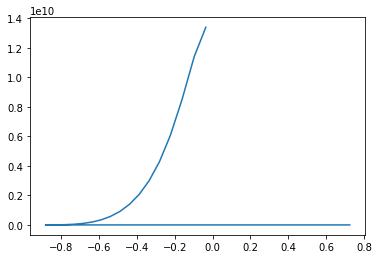

In [55]:
# theta0 vs cost
plt.plot(theta_history_adm_2[:,0], cost_history_adam_2)
plt.show()

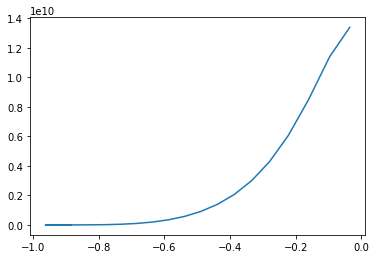

In [56]:
# theta1 vs cost
plt.plot(theta_history_adm_2[:,1], cost_history_adam_2)
plt.show()

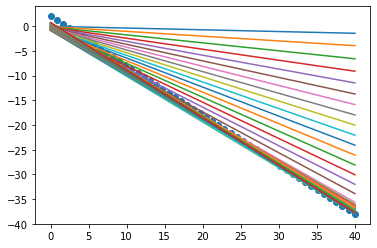

In [57]:
y_hat_adam_hist_2 =np.array([theta_history_adm_2[i,1] *x + theta_history_adm_2[i,0]*1 for i in range(theta_history_adm_2.shape[0])]) 
for line in y_hat_adam_hist_2:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

# comparison

### first trail

In [58]:
iters_com_1 = 500
alpha_com_1 = 0.025
jamma_com_mom_1 = 0.8
jamma_com_rms_1 = 0.8


In [59]:
theta_adg_com_1, cost_history_adg_com_1, theta_history_adg_com_1= adgrade_gradient_descent(X,y,theta, alpha_com_1,iters_com_1)
theta_rms_com_1, cost_history_rms_com_1, theta_history_rms_com_1 = RMSProp_gradient_descent(X,y,theta, alpha_com_1,iters_com_1,jamma_com_rms_1)
theta_adam_com_1, cost_history_adam_com_1, theta_history_adam_com_1 = Adam_gradient_descent(X,y,theta, alpha_com_1,iters_com_1,jamma_com_mom_1,jamma_com_rms_1)

In [60]:
y_hat_adg_com_1 = theta_adg_com_1[0] + theta_adg_com_1[1] *x
y_hat_rms_com_1 = theta_rms_com_1[0] + theta_rms_com_1[1] *x
y_hat_adam_com_1 = theta_adam_com_1[0] + theta_adam_com_1[1] *x

In [61]:
r2_adg = r2_score(y, y_hat_adg_com_1)
r2_rms = r2_score(y, y_hat_rms_com_1)
r2_adam = r2_score(y, y_hat_adam_com_1)

In [62]:
print("r2 for adgrade model:", r2_adg)

r2 for adgrade model: 0.9125638309196071


In [63]:
print("r2 for rms_prob model:", r2_rms)

r2 for rms_prob model: 0.9867388072748428


In [64]:
print("r2 for adam model:", r2_adam)

r2 for adam model: 0.9942728031068897


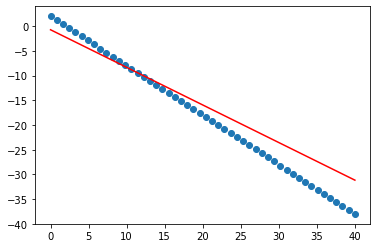

In [65]:
# best fitted line for adgrade
plt.plot(x,y_hat_adg_com_1,color= 'red')
plt.scatter(x,y)
plt.show()

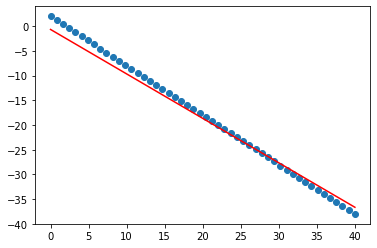

In [66]:
# best fitted line for rms_prob
plt.plot(x,y_hat_rms_com_1,color= 'red')
plt.scatter(x,y)
plt.show()

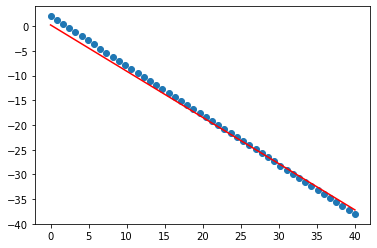

In [67]:
# best fitted line for adam
plt.plot(x,y_hat_adam_com_1,color= 'red')
plt.scatter(x,y)
plt.show()

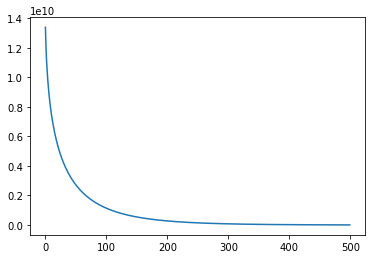

In [68]:
# cost vs iterations adgrade
plt.plot(cost_history_adg_com_1)
plt.show()

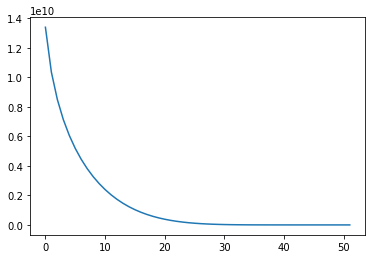

In [69]:
# cost vs iterations rms_prob
plt.plot(cost_history_rms_com_1)
plt.show()

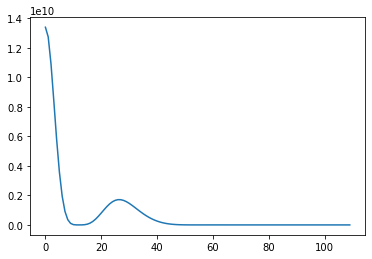

In [70]:
# cost vs iterations adam
plt.plot(cost_history_adam_com_1)
plt.show()

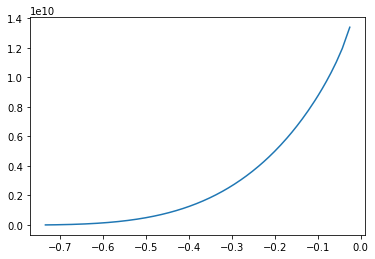

In [71]:
# theta0 vs cost adgrade
plt.plot(theta_history_adg_com_1[:,0], cost_history_adg_com_1)
plt.show()

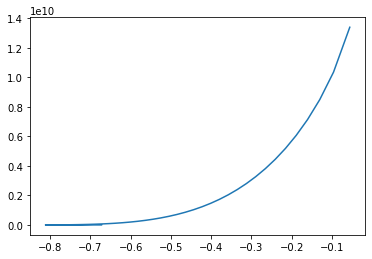

In [72]:
# theta0 vs cost rms_prob
plt.plot(theta_history_rms_com_1[:,0], cost_history_rms_com_1)
plt.show()

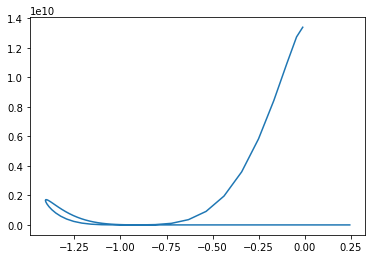

In [73]:
# theta0 vs cost adam
plt.plot(theta_history_adam_com_1[:,0], cost_history_adam_com_1)
plt.show()

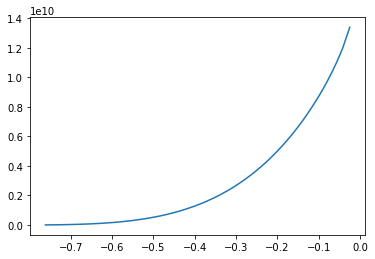

In [74]:
# theta1 vs cost adgrade
plt.plot(theta_history_adg_com_1[:,1], cost_history_adg_com_1)
plt.show()

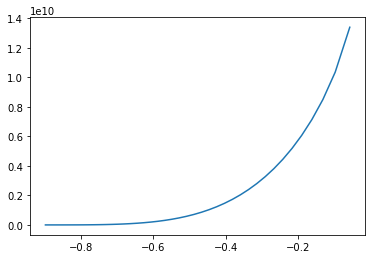

In [75]:
# theta1 vs cost rms
plt.plot(theta_history_rms_com_1[:,1], cost_history_rms_com_1)
plt.show()

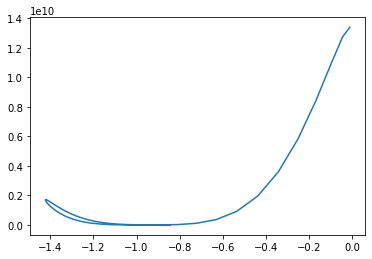

In [76]:
# theta1 vs cost adam
plt.plot(theta_history_adam_com_1[:,1], cost_history_adam_com_1)
plt.show()

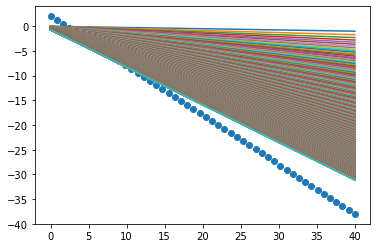

In [77]:
# all lines for adgrade 
y_hat_adg_hist_com_1 =np.array([theta_history_adg_com_1[i,1] *x + theta_history_adg_com_1[i,0]*1 for i in range(theta_history_adg_com_1.shape[0])]) 
for line in y_hat_adg_hist_com_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

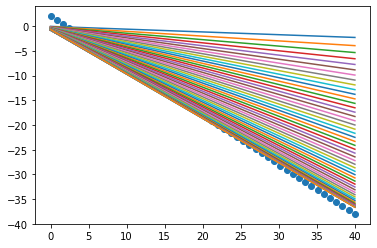

In [78]:
# all lines for rms 
y_hat_rms_hist_com_1 =np.array([theta_history_rms_com_1[i,1] *x + theta_history_rms_com_1[i,0]*1 for i in range(theta_history_rms_com_1.shape[0])]) 
for line in y_hat_rms_hist_com_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

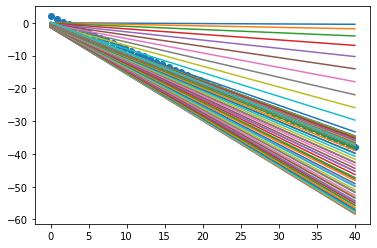

In [79]:
# all lines for adam 
y_hat_adam_hist_com_1 =np.array([theta_history_adam_com_1[i,1] *x + theta_history_adam_com_1[i,0]*1 for i in range(theta_history_adam_com_1.shape[0])]) 
for line in y_hat_adam_hist_com_1:
    plt.plot(x, line)
plt.scatter(x,y)
plt.show()

## Congratulations 
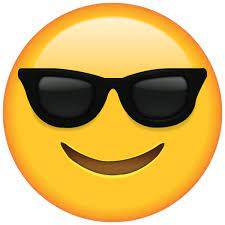